In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


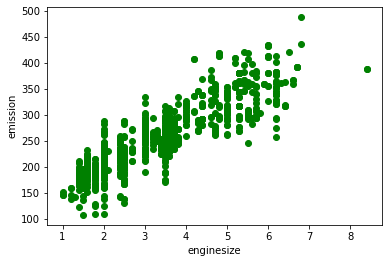

In [5]:
# plot emission values with respect to engine size
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color='green')
plt.xlabel("enginesize")
plt.ylabel("emission")
plt.show()

In [6]:
#creating train and test dataset 
msk = np.random.rand(len(df)) < 0.8 #If you split it in 80:20 proportions to train and test, your test data would contain only the labels from one class. Random shuffling prevents this.
train = cdf[msk]
test = cdf[~msk]

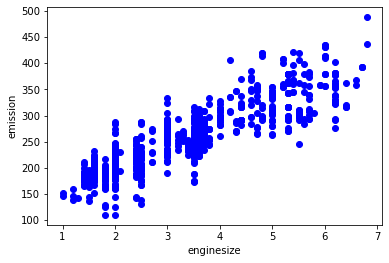

In [9]:
#train data distribution  
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS , color = 'blue')
plt.xlabel('enginesize')
plt.ylabel('emission')
plt.show()

In [10]:
#multiple regression model
from sklearn import linear_model
model = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]) # multiple inputs
y = np.asanyarray(train[['CO2EMISSIONS']])# output
model.fit(x,y)
#coefficients
print('coefficients : ',model.coef_)

coefficients :  [[12.02271563  7.02251001  9.50352398]]


In [11]:
# prediction 
predict = model.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Residual sum of squares : %.2f'% np.mean((predict - y)**2))
# variance score of 1 means perfect prediction
print('Variance score : %.2f'% model.score(x , y))

Residual sum of squares : 515.16
Variance score : 0.87
